## Explorasi Data Analisis

### 1. Deklarasi Pustaka

In [1]:
# pustaka manipulasi data array
import numpy as np
from numpy import concatenate

# pustaka manipulasi data frame
import pandas as pd
from pandas import concat
from pandas import DataFrame

# pustaka tanggal
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm


# pustaka normalisasi data
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

# pustaka data latih dan data uji
from sklearn.model_selection import train_test_split

### 2. Deklarasi Fungsi

In [2]:
# cukup jelas

### 3. Load Dataset

In [3]:
dataset = pd.read_csv("dataset/dataset_boptn.csv", parse_dates=["acq_date"])

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
 2   soi_anom  276 non-null    float64       
 3   soi_std   276 non-null    float64       
 4   sst_anom  276 non-null    float64       
 5   sst_std   276 non-null    float64       
 6   oni_anom  276 non-null    float64       
 7   oni_std   276 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 17.4 KB


In [5]:
np.round(dataset[["hotspot", "soi_anom", "soi_std", "sst_anom", "sst_std", "oni_anom", "oni_std"]].describe(), 3)

,hotspot,soi_anom,soi_std,sst_anom,sst_std,oni_anom,oni_std
count,276.000,276.000,276.000,276.000,276.000,276.000,276.000
mean,595.022,0.395,0.237,0.007,27.101,-0.034,27.042
std,1664.503,1.528,0.924,0.775,0.899,0.818,0.914
min,3.000,-5.200,-3.100,-1.590,24.970,-1.640,25.000
25%,20.000,-0.600,-0.400,-0.552,26.400,-0.612,26.377
50%,54.000,0.300,0.200,-0.070,27.180,-0.135,27.180
75%,255.750,1.325,0.825,0.470,27.700,0.470,27.623
max,14437.000,4.800,2.900,2.720,29.540,2.640,29.260


### 4. Visualisasi Data

- visualisasi time series = melihat pola kemunculan data yang bersifat stokastik

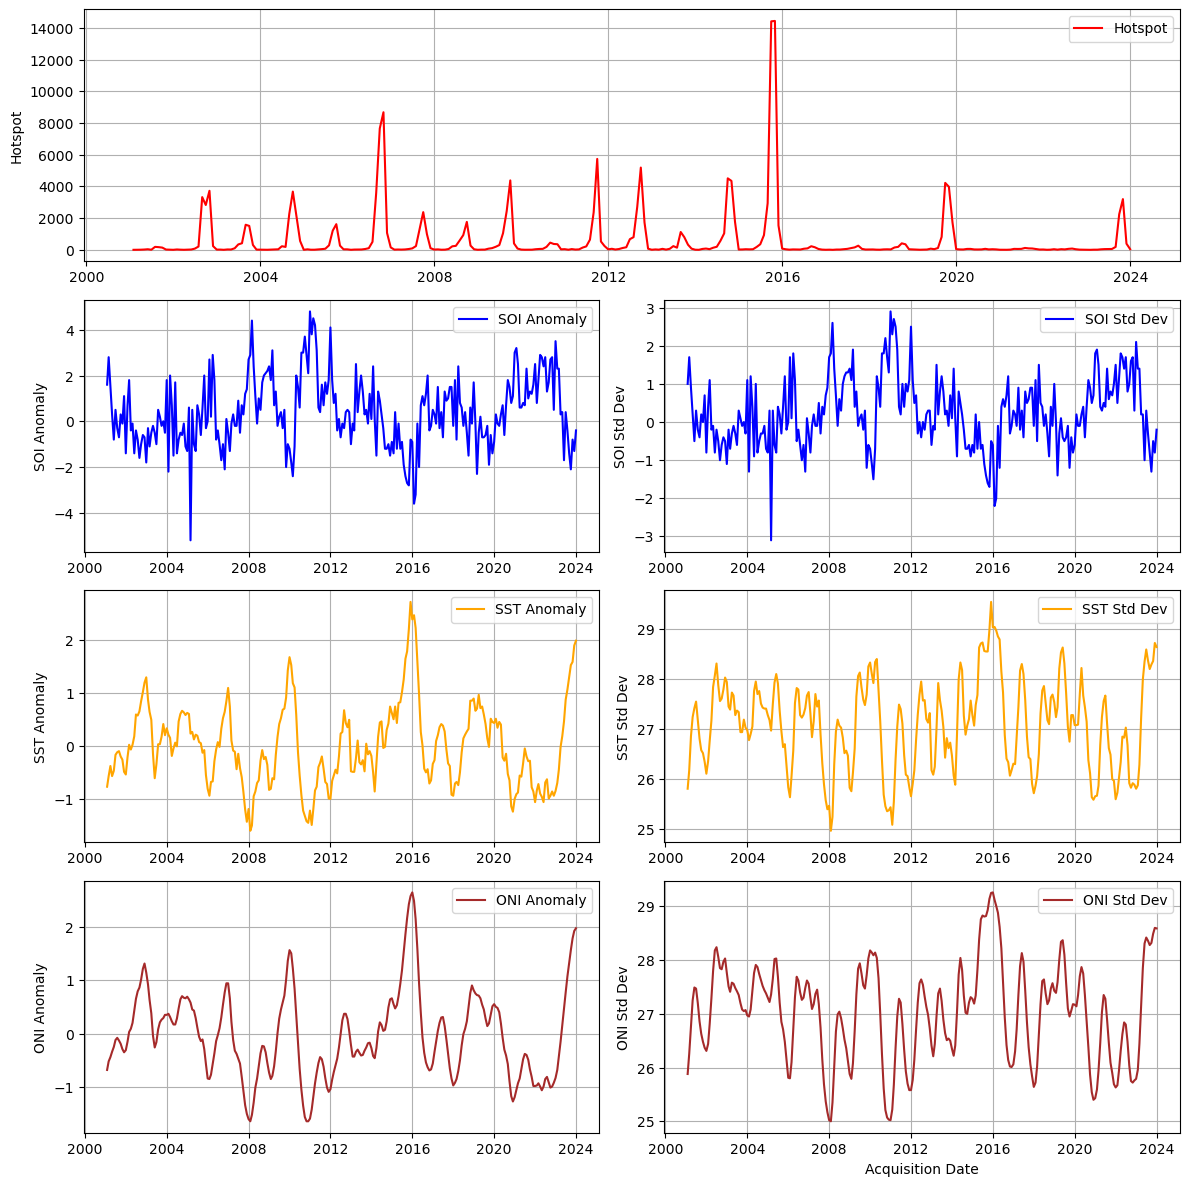

In [6]:
# Membuat figure dan gridspec
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1])

# Plot Hotspot (baris 1, kolom 1-2, digabung)
axes_hotspot = plt.subplot(gs[0, :])
axes_hotspot.plot(dataset['acq_date'], dataset['hotspot'], color='red', label='Hotspot')
axes_hotspot.set_ylabel('Hotspot')
axes_hotspot.legend()
axes_hotspot.grid(True)

# Plot SOI Anomali (kolom 1)
axes_soi_anom = plt.subplot(gs[1, 0])
axes_soi_anom.plot(dataset['acq_date'], dataset['soi_anom'], color='blue', label='SOI Anomaly')
axes_soi_anom.set_ylabel('SOI Anomaly')
axes_soi_anom.legend()
axes_soi_anom.grid(True)

# Plot SOI Standard Deviation (kolom 2)
axes_soi_std = plt.subplot(gs[1, 1])
axes_soi_std.plot(dataset['acq_date'], dataset['soi_std'], color='blue', label='SOI Std Dev')
axes_soi_std.set_ylabel('SOI Std Dev')
axes_soi_std.legend()
axes_soi_std.grid(True)

# Plot SST Anomali (kolom 1)
axes_sst_anom = plt.subplot(gs[2, 0])
axes_sst_anom.plot(dataset['acq_date'], dataset['sst_anom'], color='orange', label='SST Anomaly')
axes_sst_anom.set_ylabel('SST Anomaly')
axes_sst_anom.legend()
axes_sst_anom.grid(True)

# Plot SST Standard Deviation (kolom 2)
axes_sst_std = plt.subplot(gs[2, 1])
axes_sst_std.plot(dataset['acq_date'], dataset['sst_std'], color='orange', label='SST Std Dev')
axes_sst_std.set_ylabel('SST Std Dev')
axes_sst_std.legend()
axes_sst_std.grid(True)

# Plot ONI Anomali (kolom 1)
axes_oni_anom = plt.subplot(gs[3, 0])
axes_oni_anom.plot(dataset['acq_date'], dataset['oni_anom'], color='brown', label='ONI Anomaly')
axes_oni_anom.set_ylabel('ONI Anomaly')
axes_oni_anom.legend()
axes_oni_anom.grid(True)

# Plot ONI Standard Deviation (kolom 2)
axes_oni_std = plt.subplot(gs[3, 1])
axes_oni_std.plot(dataset['acq_date'], dataset['oni_std'], color='brown', label='ONI Std Dev')
axes_oni_std.set_ylabel('ONI Std Dev')
axes_oni_std.legend()
axes_oni_std.grid(True)

# Menambahkan label sumbu x
axes_oni_std.set_xlabel('Acquisition Date')

# Menampilkan plot
plt.tight_layout()
plt.show()


- scatter plot = melihat pola linieritas antara variabel terikat dengan bebas

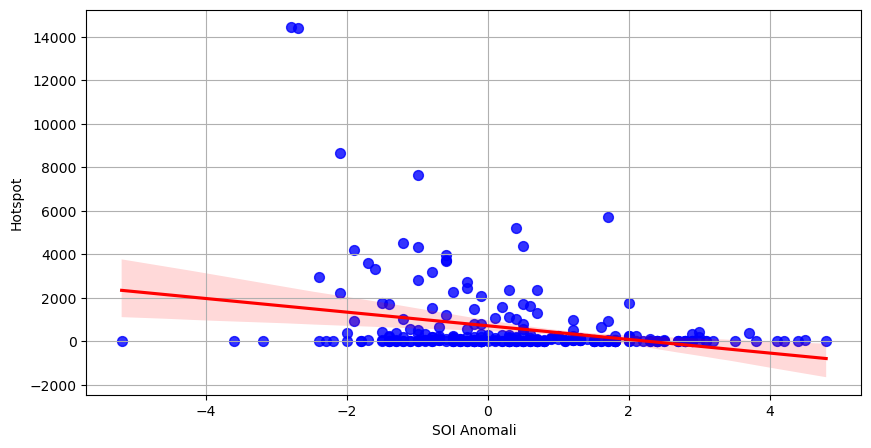

In [7]:
# Membuat scatter plot antara SOI Anomali dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='soi_anom', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('SOI Anomali')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

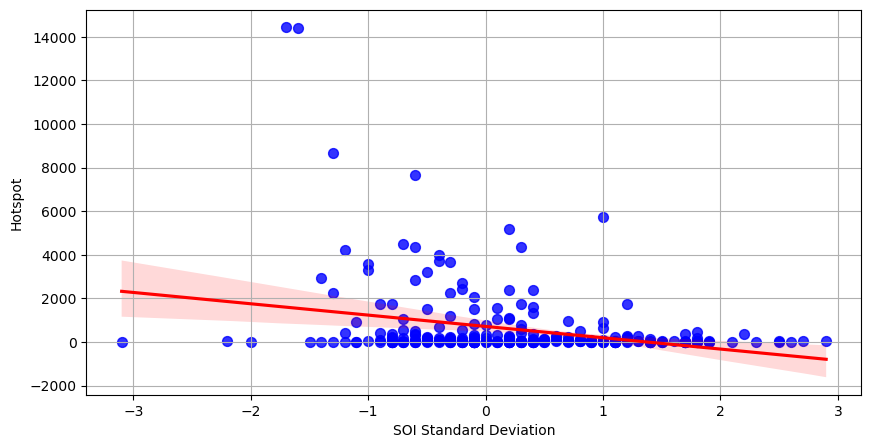

In [8]:
# Membuat scatter plot antara SOI Standar Deviation dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='soi_std', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('SOI Standard Deviation')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

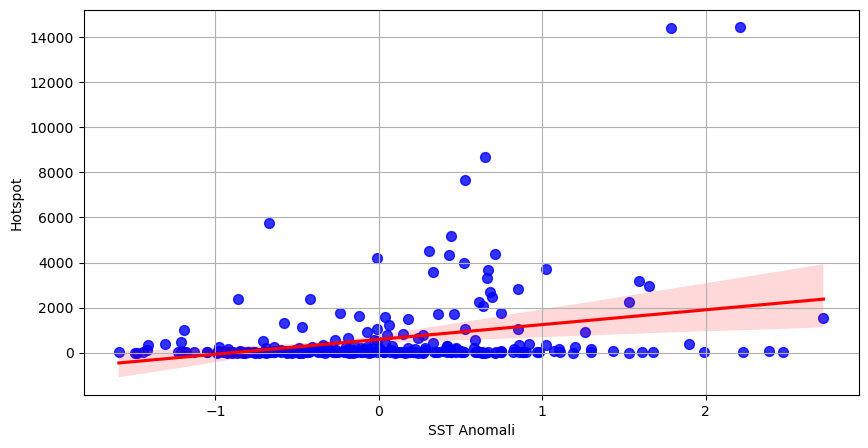

In [9]:
# Membuat scatter plot antara SST Anomali dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='sst_anom', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('SST Anomali')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

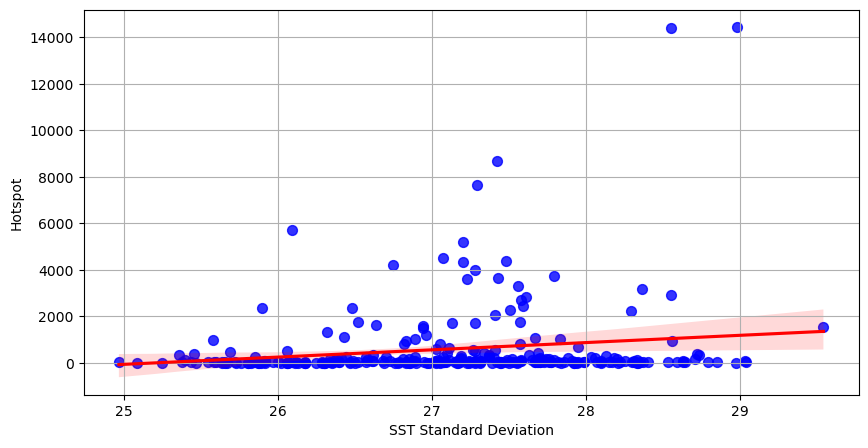

In [10]:
# Membuat scatter plot antara SST Standar Deviation dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='sst_std', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('SST Standard Deviation')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

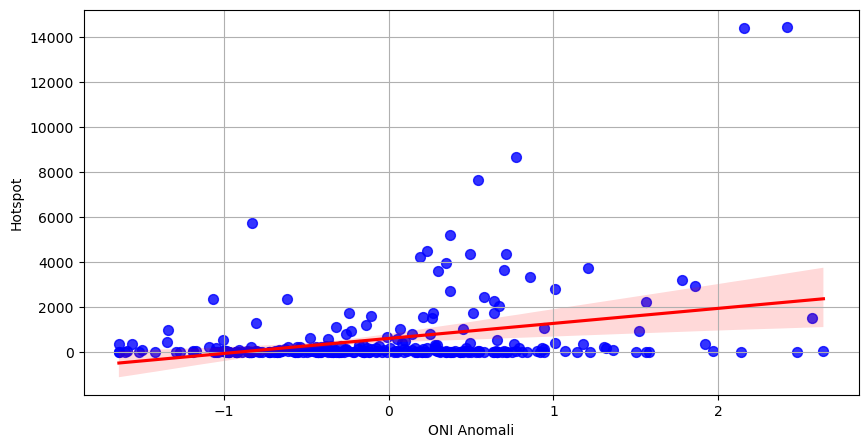

In [11]:
# Membuat scatter plot antara ONI Anomali dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='oni_anom', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('ONI Anomali')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

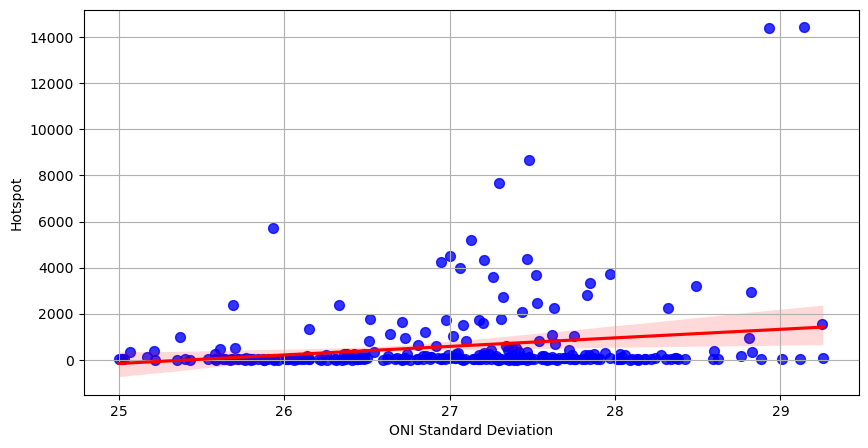

In [12]:
# Membuat scatter plot antara ONI Standar Deviation dan Hotspot dengan regresi
plt.figure(figsize=(10, 5))
sns.regplot(x='oni_std', y='hotspot', data=dataset, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('ONI Standard Deviation')
plt.ylabel('Hotspot')
plt.grid(True)
plt.show()

- heatmap coor, untuk melihat korelasi atau linieritas

In [13]:
# Memilih kolom yang ingin digunakan untuk korelasi
heatmap = dataset[["hotspot", "soi_anom", "soi_std", "sst_anom", "sst_std", "oni_anom", "oni_std"]]

# Menghitung matriks korelasi
correlation_matrix = heatmap.corr()

In [14]:
np.round(correlation_matrix, 3)

,hotspot,soi_anom,soi_std,sst_anom,sst_std,oni_anom,oni_std
hotspot,1.000,-0.288,-0.288,0.306,0.169,0.328,0.204
soi_anom,-0.288,1.000,0.999,-0.694,-0.622,-0.729,-0.670
soi_std,-0.288,0.999,1.000,-0.697,-0.625,-0.733,-0.673
sst_anom,0.306,-0.694,-0.697,1.000,0.861,0.983,0.876
sst_std,0.169,-0.622,-0.625,0.861,1.000,0.842,0.982
oni_anom,0.328,-0.729,-0.733,0.983,0.842,1.000,0.886
oni_std,0.204,-0.670,-0.673,0.876,0.982,0.886,1.000


- Histogram, untuk melihat distribusi data

C:\Users\lunox\AppData\Local\Temp\ipykernel_14188\227363032.py:12: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
c:\Users\lunox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lunox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lunox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

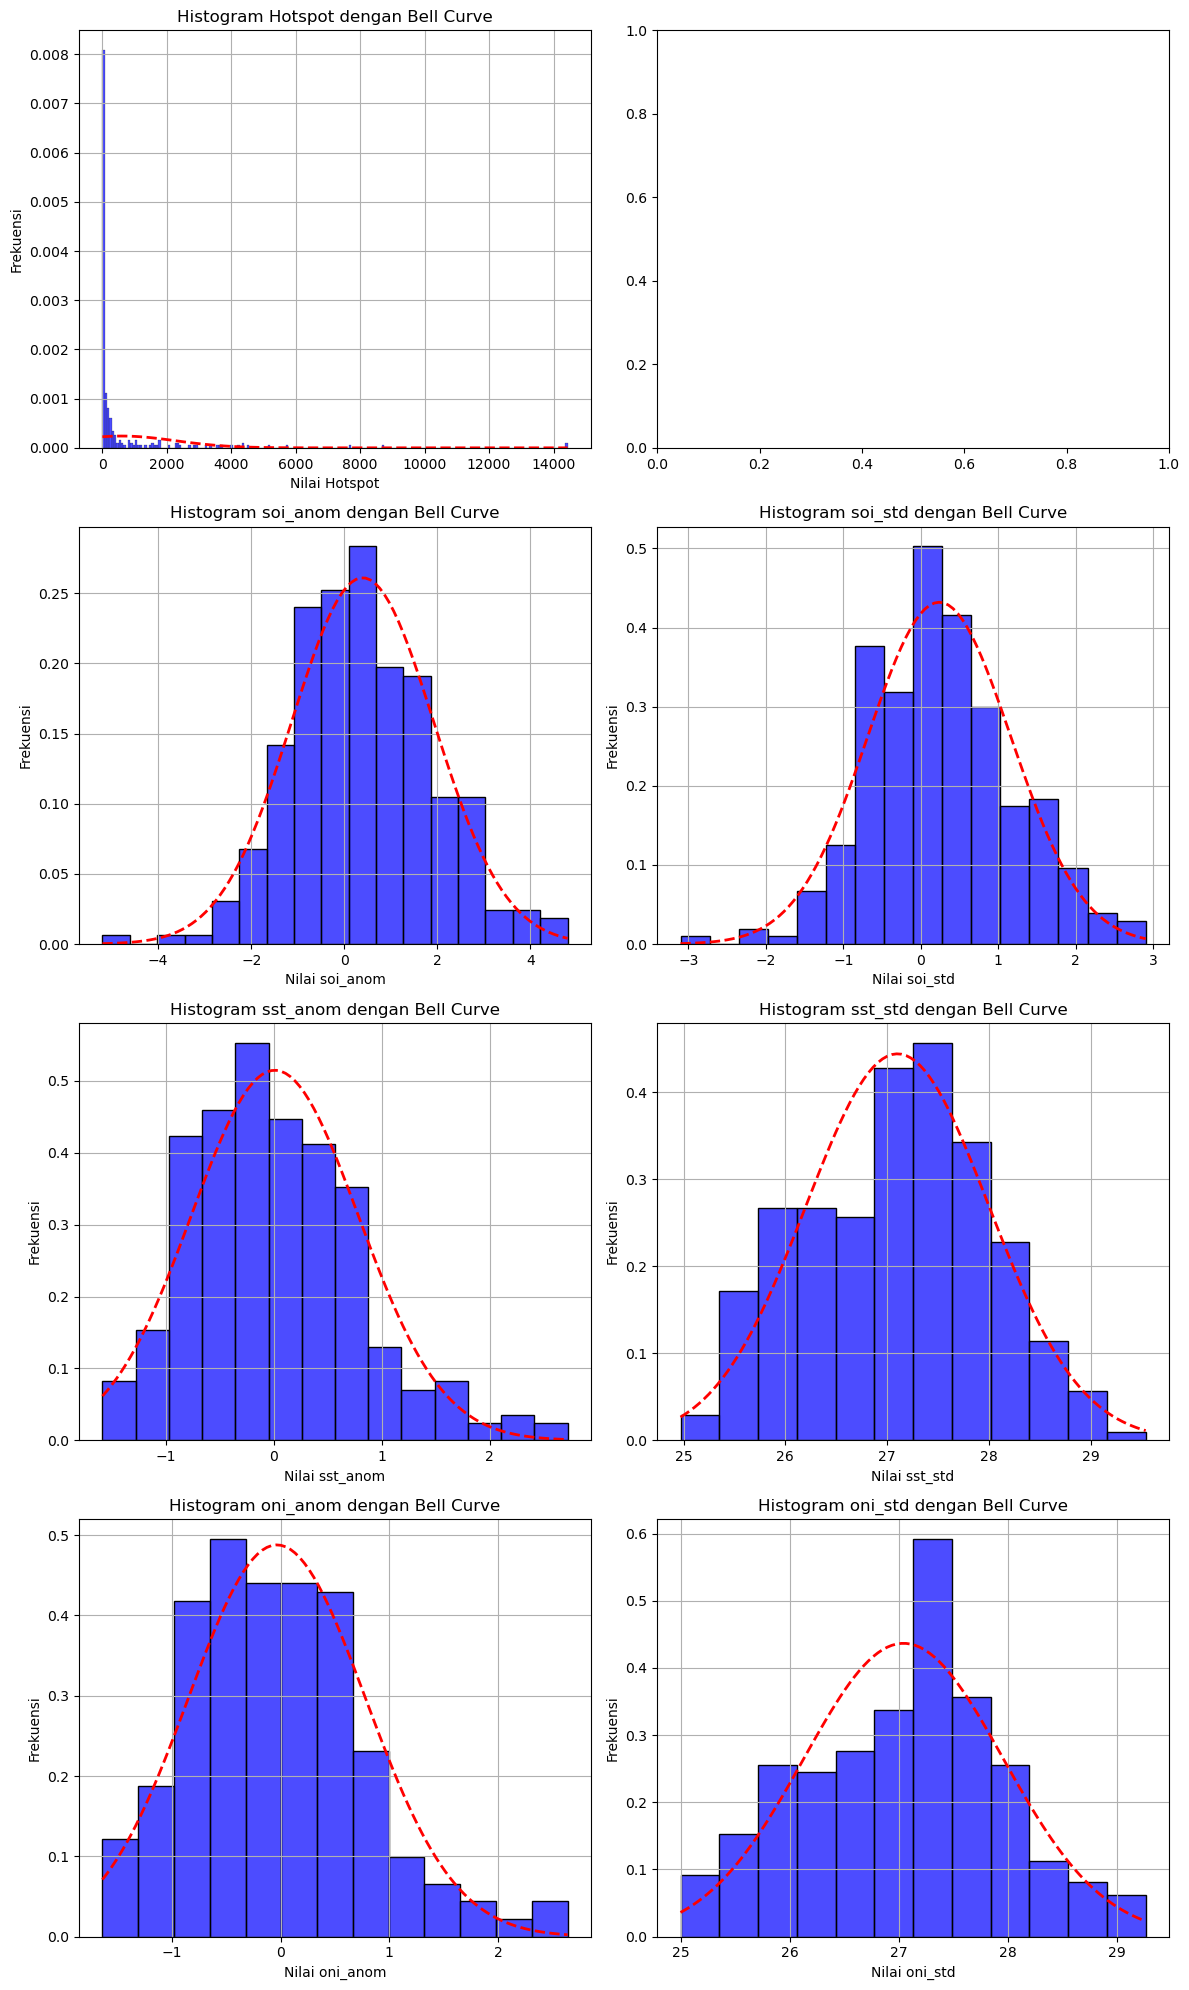

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import numpy as np

# Gantilah 'nama_file.csv' dengan nama file atau sumber data sesuai dataset Anda
# Contoh:
# dataset = pd.read_csv('nama_file.csv')

# Set option untuk mengatasi peringatan use_inf_as_na
pd.set_option('mode.use_inf_as_na', True)

# Kolom yang akan digunakan untuk histogram
selected_columns = ["hotspot", "soi_anom", "soi_std", "sst_anom", "sst_std", "oni_anom", "oni_std"]

# Membuat subplots dengan jumlah baris yang sesuai
num_rows = (len(selected_columns) + 1) // 2  # Menambahkan 1 agar hasil pembagian bulat naik ke atas jika ada sisa
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))

# Menentukan posisi subplot untuk "hotspot"
axes_hotspot = axes[0, 0]  # Berada di baris 0, kolom 0

# Membuat histogram untuk "hotspot"
sns.histplot(dataset["hotspot"], bins="auto", stat="density", color='blue', alpha=0.7, ax=axes_hotspot)

# Menghitung mean dan standard deviasi untuk "hotspot"
mean_hotspot = dataset["hotspot"].mean()
std_dev_hotspot = dataset["hotspot"].std()

# Menghasilkan nilai x untuk kurva bel "hotspot"
x_hotspot = np.linspace(dataset["hotspot"].min(), dataset["hotspot"].max(), 100)
# Menghitung nilai y untuk kurva bel "hotspot"
y_hotspot = norm.pdf(x_hotspot, mean_hotspot, std_dev_hotspot)

# Menambahkan kurva bel ke plot "hotspot"
axes_hotspot.plot(x_hotspot, y_hotspot, 'r--', linewidth=2)

# Menambahkan judul dan label untuk "hotspot"
axes_hotspot.set_title('Histogram Hotspot dengan Bell Curve')
axes_hotspot.set_xlabel('Nilai Hotspot')
axes_hotspot.set_ylabel('Frekuensi')
axes_hotspot.grid(True)

# Loop untuk membuat histogram untuk setiap kolom selain "hotspot"
for i, column in enumerate(selected_columns[1:]):  # Mulai dari index 1 untuk menghindari "hotspot"
    # Menghitung baris dan kolom untuk subplot
    row = i // 2 + 1
    col = i % 2
    
    # Membuat histogram
    sns.histplot(dataset[column], bins="auto", stat="density", color='blue', alpha=0.7, ax=axes[row, col])
    
    # Menghitung mean dan standard deviasi
    mean = dataset[column].mean()
    std_dev = dataset[column].std()
    
    # Menghasilkan nilai x untuk kurva bel
    x = np.linspace(dataset[column].min(), dataset[column].max(), 100)
    # Menghitung nilai y untuk kurva bel
    y = norm.pdf(x, mean, std_dev)
    
    # Menambahkan kurva bel ke plot
    axes[row, col].plot(x, y, 'r--', linewidth=2)
    
    # Menambahkan judul dan label
    axes[row, col].set_title(f'Histogram {column} dengan Bell Curve')
    axes[row, col].set_xlabel(f'Nilai {column}')
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True)

# Menyesuaikan layout
plt.tight_layout()
plt.show()
